# Arithmetic Reasoning with Reasoning Core

This notebook provides a simple showcase of the `reasoning_core` library using one of its most fundamental tasks: **Arithmetic**. These tasks demonstrate evaluating mathematical expressions and algebraic equations.

We will cover how to initialize tasks, scale their difficulty levels, examine their generated "Chain of Thought" (CoT), and tweak custom generation parameters.

In [73]:
import sys
import os

# Ensure reasoning_core is in the path
sys.path.append(os.path.abspath(".."))

import reasoning_core as rcr
from IPython.display import display, Markdown

## 1. Initialize the Task

We begin by instantiating the `Arithmetics` task. This task generates procedurally created mathematical expressions that must optionally be reduced using the provided mathematical operators.

In [74]:
task_arith = rcr.get_task("Arithmetics")
print("Task initialized:", task_arith.task_name)

Task initialized: arithmetics


We'll also initialize the `SymbolicArithmetics` task, which performs algebraic simplifications.

In [75]:
task_sym = rcr.get_task("SymbolicArithmetics")
print("Task initialized:", task_sym.task_name)

Task initialized: symbolic_arithmetics


## 2. Understanding Difficulty Levels

The library dynamically scales the difficulty of problems using `.config.set_level(level)`. As the level increases, expressions become longer and deeper, evaluating more complex mathematical trees.

### 2.1 Basic Level 0 Generation

In [76]:
# Set a seed and demonstrate Level 0
task_arith.config.set_level(0)

print(f"Level 0 Config Depth: Min {task_arith.config.min_depth}, Max {task_arith.config.max_depth}")

example_l0 = task_arith.generate_example()
print("Level 0 Prompt: \n", example_l0.prompt)
print("\nLevel 0 Answer: ", example_l0.answer)

Level 0 Config Depth: Min 3, Max 5
Level 0 Prompt: 
 Evaluate -7 + 3.
Answer with only a number.

Level 0 Answer:  -4


### 2.2 Advanced Levels

When we increase the level, the depth of the abstract syntax tree for the expression expands significantly.

In [77]:
task_arith.config.set_level(3)
print(f"Level 3 Config Depth: Min {task_arith.config.min_depth}, Max {task_arith.config.max_depth}")

example_l3 = task_arith.generate_example()
print("Level 3 Prompt: \n", example_l3.prompt)
print("\nLevel 3 Answer: ", example_l3.answer)

Level 3 Config Depth: Min 6, Max 8
Level 3 Prompt: 
 Evaluate 12 - (10) + -15 - min(-8, -5 + -8.4) - (10 / abs(5)) + round(-1 * -15 + 15 + -15) + 3 / -12.
Answer with only a number.

Level 3 Answer:  13.15


The levels are meant to scale well, at least to level 10

In [78]:
task_arith.config.set_level(10)

example_l10 = task_arith.generate_example()
print("Level 10 Prompt: \n", example_l10.prompt)
print("\nLevel 10 Answer: ", example_l10.answer)

Level 10 Prompt: 
 Evaluate (min(max(-8.50 / -11, 1 + 14 + 14), -15 * 13 * -10.4 / -13 / -13 + -11.3 * -13 - -7 - 14 - -1 / -12 - ((-1) * 1 + 6.300) + abs(10) / -5 / 15 / -1 * -6 * 11 / 6 - -4 * -6 + -11.6 + -1 + -8.4 - (-11.4 + -1) + (-3 + -9)**2 + min(14, 7) + (1)**2 / (4 + max(min(-3.00, 7.40), (round(-8 / 3)))) + -8.300 - 7.50 / 5.40 + 9.30 + max(7, min(2, 8)))).
Answer with only a number.

Level 10 Answer:  29


### 2.3 Chain of Thought (CoT)

The library doesn't only provide (Prompt,Answer) couple, it also provides the algorithmic trace of the problem resolution. This feature can be leveraged for procedural pretraining.

In [79]:
print("-> Level 0 CoT:\n")
print(example_l0.metadata.cot)

print("\n-> Level 3 CoT:\n")
print(example_l3.metadata.cot)

print("\n-> Level 10 CoT:\n")
print(example_l10.metadata.cot)

-> Level 0 CoT:

-7 + 3 = -4

-> Level 3 CoT:

12 - 10 = 2
2 + -15 = -13
-5 + -8.4 = -13.4
min(-8, -13.4) = -13.4
-13 - -13.4 = 0.4
abs(5) = 5
10 / 5 = 2
0.4 - 2 = -1.6
-1 * -15 = 15
15 + 15 = 30
30 + -15 = 15
round(15) = 15
-1.6 + 15 = 13.4
3 / -12 = -0.25
13.4 + -0.25 = 13.15

-> Level 10 CoT:

-8.5 / -11 = 17/22
1 + 14 = 15
15 + 14 = 29
max(17/22, 29) = 29
-15 * 13 = -195
-195 * -10.4 = 2028
2028 / -13 = -156
-156 / -13 = 12
-11.3 * -13 = 146.9
12 + 146.9 = 158.9
158.9 - -7 = 165.9
165.9 - 14 = 151.9
-1 / -12 = 1/12
151.9 - 1/12 = 9109/60
-1 * 1 = -1
-1 + 6.3 = 5.3
9109/60 - 5.3 = 8791/60
abs(10) = 10
10 / -5 = -2
-2 / 15 = -2/15
-2/15 / -1 = 2/15
2/15 * -6 = -0.8
-0.8 * 11 = -8.8
-8.8 / 6 = -22/15
8791/60 + -22/15 = 145.05
-4 * -6 = 24
145.05 - 24 = 121.05
121.05 + -11.6 = 109.45
109.45 + -1 = 108.45
108.45 + -8.4 = 100.05
-11.4 + -1 = -12.4
100.05 - -12.4 = 112.45
-3 + -9 = -12
-12 ** 2 = 144
112.45 + 144 = 256.45
min(14, 7) = 7
256.45 + 7 = 263.45
1 ** 2 = 1
min(-3, 7.4) = -3
-8 

### 2.4 Score mechanism

The library also provides a normalized score mechanisme tailored to each task of the `reasoning_core` library. This feature has been designed for Reinforcement Learning training, such as GRPO.

In [80]:
rcr.score_answer(example_l3.answer, example_l3)

1.0

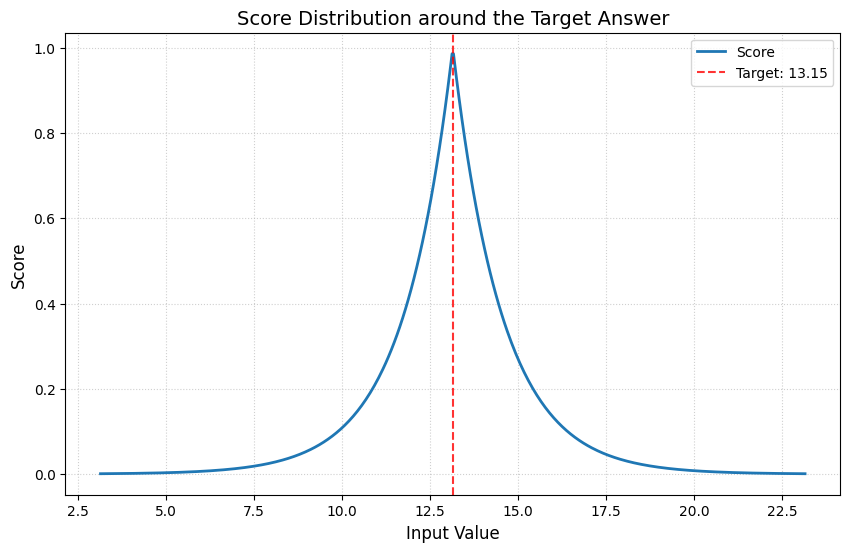

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get the center value as a float
center_ans = float(example_l3.answer)

x_axis = np.linspace(center_ans - 10, center_ans + 10, 500)

y_axis = [rcr.score_answer(x, example_l3) for x in x_axis]

plt.figure(figsize=(10, 6))
plt.plot(x_axis, y_axis, label='Score', color='#1f77b4', linewidth=2)

plt.axvline(x=center_ans, color='red', linestyle='--', alpha=0.8, label=f'Target: {center_ans}')

plt.title('Score Distribution around the Target Answer', fontsize=14)
plt.xlabel('Input Value', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)

plt.show()

## 3. Configuration and Task Options

Each task in `reasoning_core` has an associated configuration object. For arithmetic, we can explicitly alter properties like trailing zero possibilities, decimal precision, or floating point occurrences.

In [86]:
task_arith.config.set_level(3) #put it back to level 3
# Force the arithmetic task to always use floats and 4 decimal places
task_arith.config.float_prob = 1.0
task_arith.config.out_decimals = 4
task_arith.config.in_decimals = 4

advanced_arith_example = task_arith.generate_example()
print("Float-only Arithmetic:\n", advanced_arith_example.prompt)
print("\nAnswer:", advanced_arith_example.answer)

Float-only Arithmetic:
 Evaluate 4.500 * -6.3988 / 0.04 - -7.12 / -2.5 - 2.86 + 1.4059 + -1.1 - 0.54.
Answer with only a number.

Answer: -725.8071


## 4. Symbolic Arithmetics

To showcase the structural flexibility of tasks, you can also use `SymbolicArithmetics`, which generates algebraic simplification problems instead of numerical evaluations.

In [87]:
task_sym.config.set_level(1)

sym_example = task_sym.generate_example()
print("Symbolic Prompt:\n", sym_example.prompt)
print("\nSymbolic Answer:\n", sym_example.answer)
print("\nSymbolic CoT:\n", sym_example.metadata.cot)
print("\nScore answer of {}:\n", sym_example.metadata.cot)

Symbolic Prompt:
 Simplify the following algebraic expression:
x * max(y, x * x + 3)

Answer with the simplified expression.

Symbolic Answer:
 x*max(y, x**2 + 3)

Symbolic CoT:
 x*x = x**2

Score answer of {}:
 x*x = x**2


In [89]:
print("""\nTrue score answer":\n""", rcr.score_answer(sym_example.answer, sym_example))


True score answer":
 1.0


## 5. Dataset Generation

In [ ]:
import datasets
import pandas as pd

# 1. Generate data, as a list of Problem
data = task_sym.generate_balanced_batch(5, level=1)

# 2. Create DataFrame
df = pd.DataFrame(data)
display(df.head())

# 3. Convert to Hugging Face Dataset
hf_dataset = datasets.Dataset.from_pandas(df)

# 4. Split into train and test
dataset_dict = hf_dataset.train_test_split(test_size=0.2)
print("\nDataset Structure:", dataset_dict)

,answer,metadata,prompt,task
0,y + 144,"{'expr': 'max(abs(9) + 7 * 7, (4 * 3)**2) + y'...",Simplify the following algebraic expression:\n...,symbolic_arithmetics
1,x - 5,"{'expr': '2 + x - 7', 'cot': '-1*7 = -7 x - 7 ...",Simplify the following algebraic expression:\n...,symbolic_arithmetics
2,1,"{'expr': '(5 - 4)', 'cot': '-1*4 = -4 -4 + 5 =...",Simplify the following algebraic expression:\n...,symbolic_arithmetics
3,x + 4,"{'expr': 'min(y, y) - y + x + 4', 'cot': 'x - ...",Simplify the following algebraic expression:\n...,symbolic_arithmetics
4,1,"{'expr': '(min(1, 2))**2', 'cot': '1**2 = 1', ...",Simplify the following algebraic expression:\n...,symbolic_arithmetics



Dataset Structure: DatasetDict({
    train: Dataset({
        features: ['answer', 'metadata', 'prompt', 'task'],
        num_rows: 4
    })
    test: Dataset({
        features: ['answer', 'metadata', 'prompt', 'task'],
        num_rows: 1
    })
})
